In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

In [46]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.optimizers import SGD

from keras import backend as K

In [70]:
def times_pi(x):
    return x * (2 * np.pi)

In [83]:
num_hidden = 1

model = Sequential()
model.add(SimpleRNN(input_dim=1, output_dim=num_hidden, return_sequences=True))
model.add(Activation(times_pi))
model.add(Activation(K.sin))
model.add(SimpleRNN(input_dim=num_hidden, output_dim=1, return_sequences=True))
sgd = SGD(lr=0.1)

model.compile(loss='mean_squared_error', optimizer=sgd)
# model.compile(loss='mse', optimizer='sgd')

In [84]:
from deepfreq import datasets

BATCH_SIZE = 1024*128
LENGTH = 256
every_n = 10

# make training data
X, Y = datasets.batch(BATCH_SIZE, datasets.one_every_n, LENGTH, every_n)

# train model
history = model.fit(X, Y, nb_epoch=1, batch_size=128)

Epoch 1/1
131072/131072 [==============================] - 74s - loss: 0.0971    


In [85]:
# predict one example
X, Y = datasets.batch(1, datasets.one_every_n, LENGTH, every_n)
Y_out = model.predict(X)

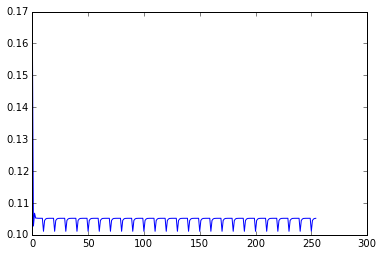

In [86]:
# plot example
# plot(X[0,:])
# show()
# plot(Y[0,:])
plot(Y_out[0,:])
# show()